In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import os.path
from pathlib import Path
import glob
import re

from scipy.io.wavfile import read, write
import pydub
from pydub import AudioSegment, effects
import librosa
import librosa.display
from librosa.util import fix_length
import noisereduce as nr
from noisereduce.noisereducev1 import reduce_noise
import IPython as ipd
from IPython.display import Audio

# path_tess = "data/tess/tess toronto emotional speech set data/OAF_angry/OAF_back_angry.wav"
# path_rav = "data/rav/Actor_01/03-01-01-01-01-01-01.wav"
# path_savee = "data/savee/DC_a01.wav"
# path_crema = "data/crema/1001_DFA_ANG_XX.wav"

path_tess = "data/tess"
path_rav = "data/rav/actors"
path_savee = "data/savee"
path_crema = "data/crema"

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)


In [131]:

def load_tess(path):
    wavs = []
    emotions = []
    emotion_tess = {"disgust": "disgust", "ps": "surprised", "fear": "fear", "angry": "angry", "neutral": "neural", "sad": "sad", "happy": "happy"}
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            wavs.append(os.path.join(dirname,filename))
            emotion = filename.split("_")[-1]
            emotion = emotion.split(".")[0]
            emotions.append(emotion.lower())
    df = pd.DataFrame()
    df["wavs"] = wavs
    df["emotion"] = emotions
    df = df.replace({"emotion": emotion_tess})
    
    return df
        

def load_rav(path):
    wavs = []
    emotions = []
    emotion_ravdess = {"01":"neutral","02":"calm","03":"happy","04":"sad","05":"angry","06":"fear","07":"disgust","08":"surprised"}
    for dirname, dirs, filenames in os.walk(path):
        for filename in filenames:
            wavs.append(os.path.join(dirname,filename))
            emotion = filename.split("-")[2]
            emotions.append(emotion.lower())  
    df = pd.DataFrame()
    df["wavs"] = wavs
    df["emotion"] = emotions
    df = df.replace({"emotion": emotion_ravdess})
    
    return df

def load_crema(path):
    wavs = []
    emotions = []
    emotion_crema = {"sad":"sad","ang":"angry","dis":"disgust","fea":"fear","hap":"happy","neu":"neutral"}
    for dirname, dirs, filenames in os.walk(path):
        for filename in filenames:
            wavs.append(os.path.join(dirname,filename))
            emotion = filename.split("_")[2]
            emotions.append(emotion.lower())  
    df = pd.DataFrame()
    df["wavs"] = wavs
    df["emotion"] = emotions
    df = df.replace({"emotion": emotion_crema})
    
    return df

def load_savee(path):
    wavs = []
    emotions = []
    emotion_savee = {"a":"angry","d":"disgust","f":"fear","h":"happy","n":"neutral","sa":"sad","su":"surprised"}
    for dirname, dirs, filenames in os.walk(path):
        for filename in filenames:
            wavs.append(os.path.join(dirname,filename))
            emotion = filename.split("_")[1]
            emotion = re.match(r"([a-z]+)([0-9]+)",emotion)[1]
            emotions.append(emotion.lower())   
    df = pd.DataFrame()
    df["wavs"] = wavs
    df["emotion"] = emotions
    df = df.replace({"emotion": emotion_savee})
    
    return df

def merge_dfs():
    df_ravdess = load_tess(path_tess)
    df_crema = load_rav(path_rav)
    df_tess = load_crema(path_crema)
    df_savee = load_savee(path_savee)

    frames = [df_ravdess,df_crema,df_tess,df_savee]
    df= pd.concat(frames)
    df.reset_index(drop=True,inplace=True)
    
    df.to_csv("all_data_corr.csv",index=False,header=True)
    print("Total length of the dataset is {}".format(len(df)))
    return df

In [132]:
df_tess = load_tess(path_tess)
df_rav = load_rav(path_rav)
df_crema = load_crema(path_crema)
df_savee = load_savee(path_savee)
df_tess.shape, df_rav.shape, df_crema.shape, df_savee.shape

((5600, 2), (1440, 2), (7442, 2), (480, 2))

### emotions to analyse = "angry", "disgust", "fear", "happy", "neural", "surprised", "sad"

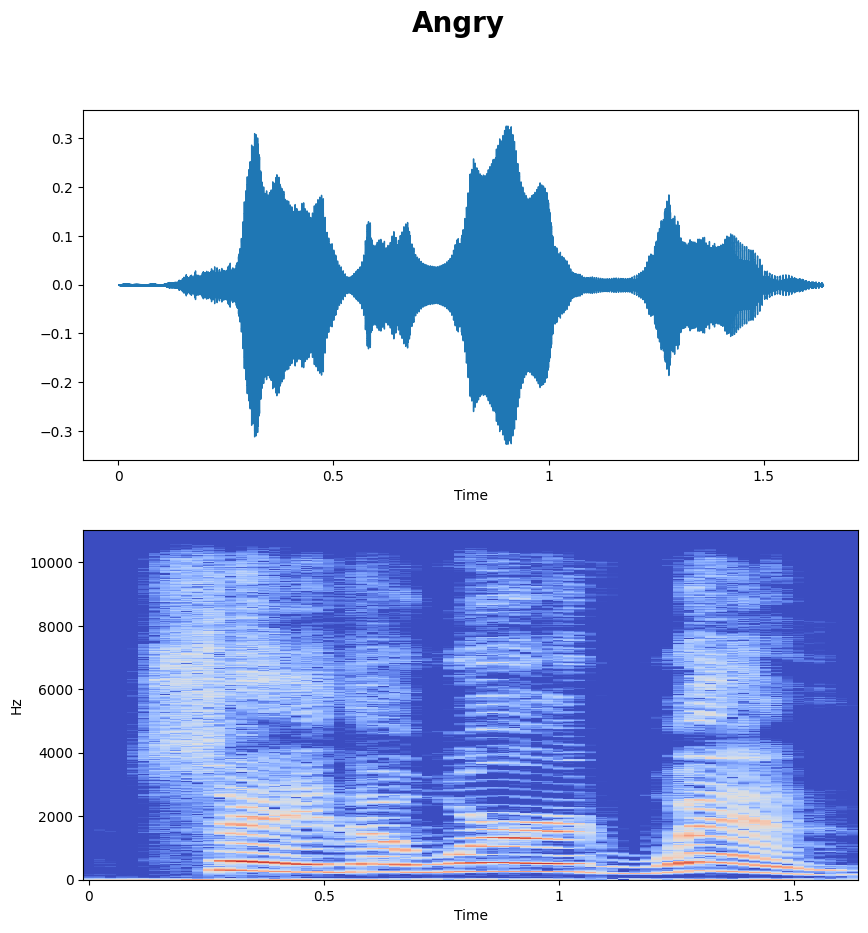

<Figure size 640x480 with 0 Axes>

In [154]:
emotion = 'angry'
path = np.array(df_tess['wavs'][df_tess['emotion']==emotion])[0]
data, sr = librosa.load(path)
x = librosa.stft(data)
xdb = librosa.amplitude_to_db(abs(x))

fig, axs = plt.subplots(2,figsize=(10, 10))
fig.suptitle('Angry', fontweight="bold", size=20)

librosa.display.waveshow(data, sr=sr, ax=axs[0]);

librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz', ax=axs[1])
plt.show()
plt.savefig("plots/angry.png")

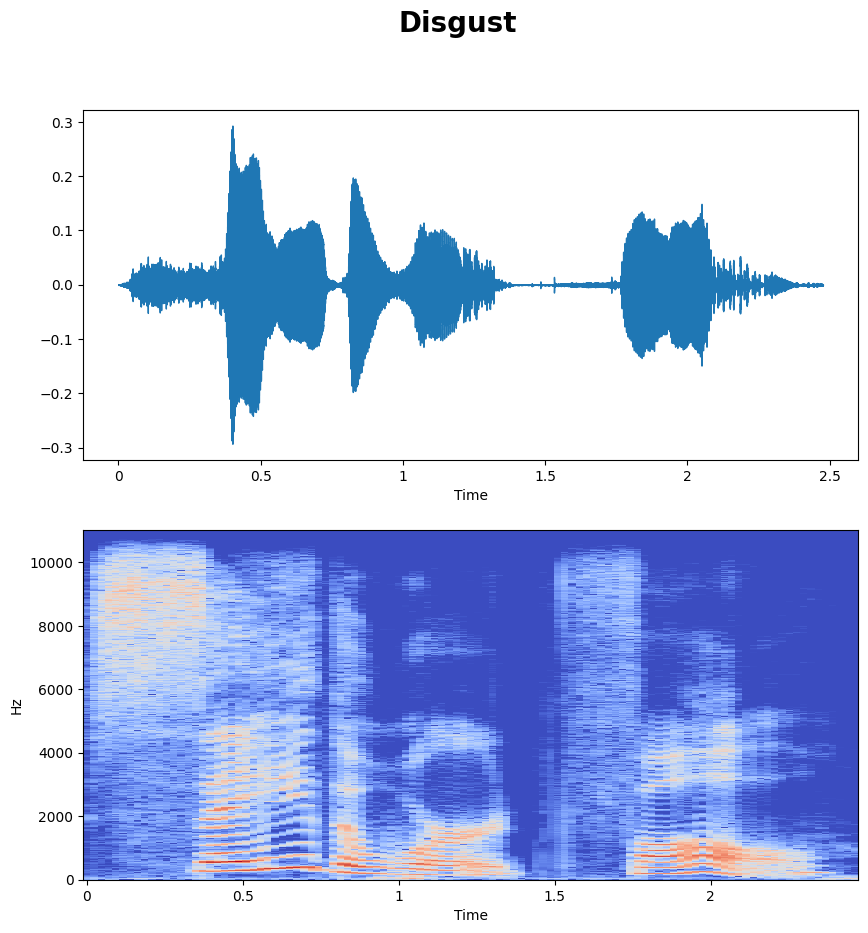

<Figure size 640x480 with 0 Axes>

In [152]:
emotion = 'disgust'
path = np.array(df_tess['wavs'][df_tess['emotion']==emotion])[0]
data, sr = librosa.load(path)
x = librosa.stft(data)
xdb = librosa.amplitude_to_db(abs(x))

fig, axs = plt.subplots(2,figsize=(10, 10))
fig.suptitle('Disgust', fontweight="bold", size=20)

librosa.display.waveshow(data, sr=sr, ax=axs[0]);

librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz', ax=axs[1])
plt.show()
plt.savefig("plots/disgust.png")

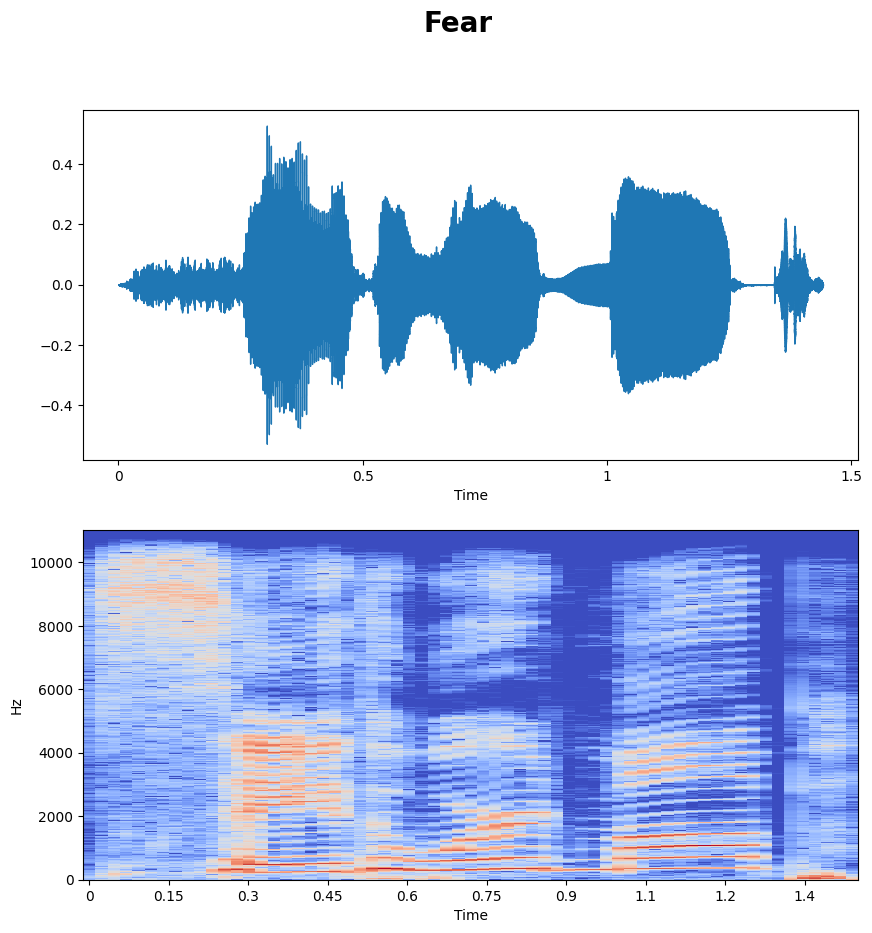

<Figure size 640x480 with 0 Axes>

In [155]:
emotion = 'fear'
path = np.array(df_tess['wavs'][df_tess['emotion']==emotion])[0]
data, sr = librosa.load(path)
x = librosa.stft(data)
xdb = librosa.amplitude_to_db(abs(x))

fig, axs = plt.subplots(2,figsize=(10, 10))
fig.suptitle('Fear', fontweight="bold", size=20)

librosa.display.waveshow(data, sr=sr, ax=axs[0]);

librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz', ax=axs[1])
plt.show()
plt.savefig("plots/fear.png")

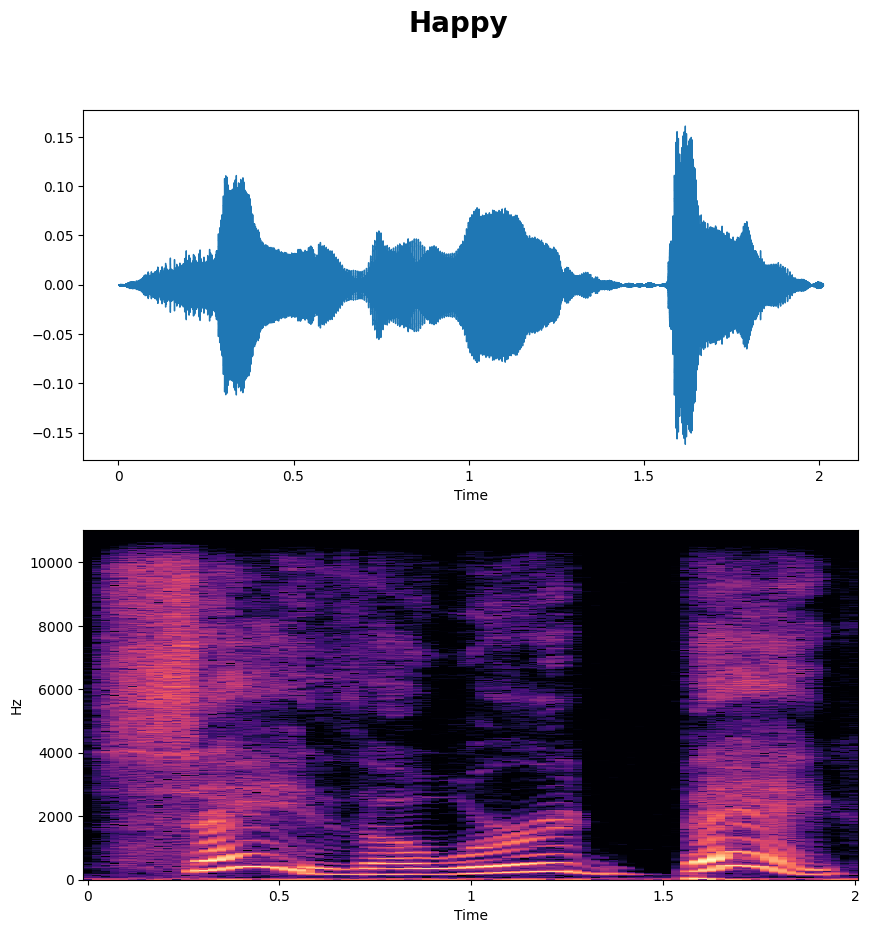

<Figure size 640x480 with 0 Axes>

In [156]:
emotion = 'happy'
path = np.array(df_tess['wavs'][df_tess['emotion']==emotion])[0]
data, sr = librosa.load(path)
x = librosa.stft(data)
xdb = librosa.amplitude_to_db(abs(x))

fig, axs = plt.subplots(2,figsize=(10, 10))
fig.suptitle('Happy', fontweight="bold", size=20)

librosa.display.waveshow(data, sr=sr, ax=axs[0]);

librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz', ax=axs[1])
plt.show()
plt.savefig("plots/happy.png")

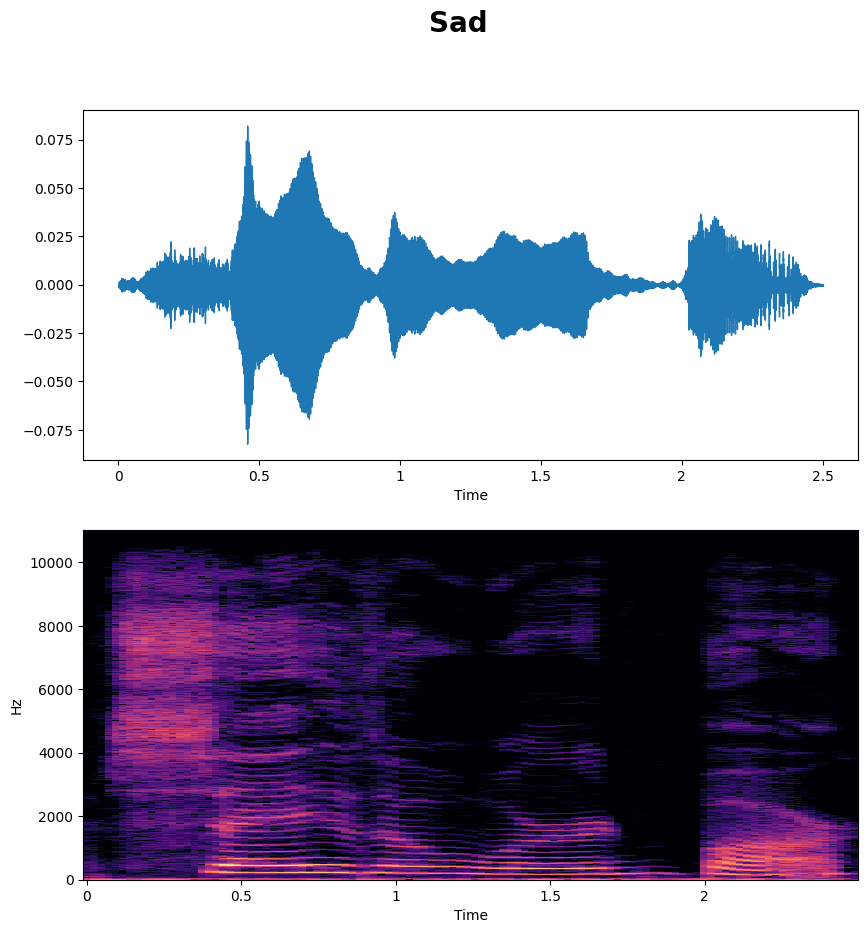

<Figure size 640x480 with 0 Axes>

In [159]:
emotion = 'sad'
path = np.array(df_tess['wavs'][df_tess['emotion']==emotion])[0]
data, sr = librosa.load(path)
x = librosa.stft(data)
xdb = librosa.amplitude_to_db(abs(x))

fig, axs = plt.subplots(2,figsize=(10, 10))
fig.suptitle('Sad', fontweight="bold", size=20)

librosa.display.waveshow(data, sr=sr, ax=axs[0]);

librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz', ax=axs[1])
plt.show()
plt.savefig("plots/sad.jpg")

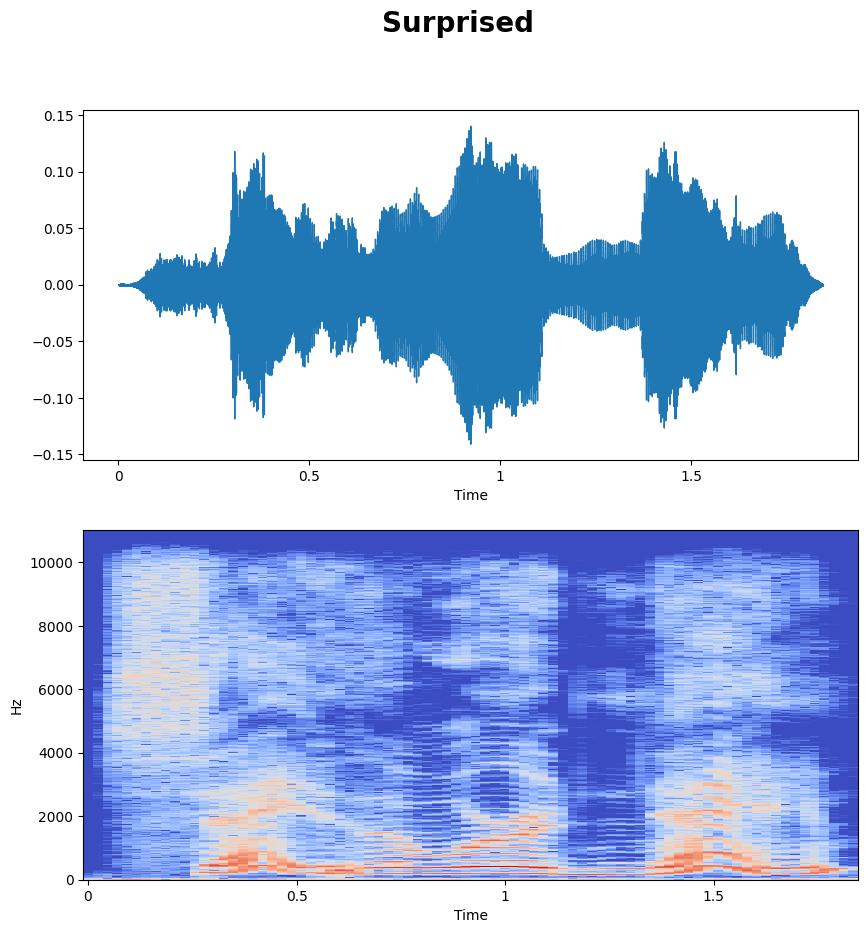

<Figure size 640x480 with 0 Axes>

In [158]:
emotion = 'surprised'
path = np.array(df_tess['wavs'][df_tess['emotion']==emotion])[0]
data, sr = librosa.load(path)
x = librosa.stft(data)
xdb = librosa.amplitude_to_db(abs(x))

fig, axs = plt.subplots(2,figsize=(10, 10))
fig.suptitle('Surprised', fontweight="bold", size=20)

librosa.display.waveshow(data, sr=sr, ax=axs[0]);

librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz', ax=axs[1])
plt.show()
plt.savefig("plots/surprised.png")

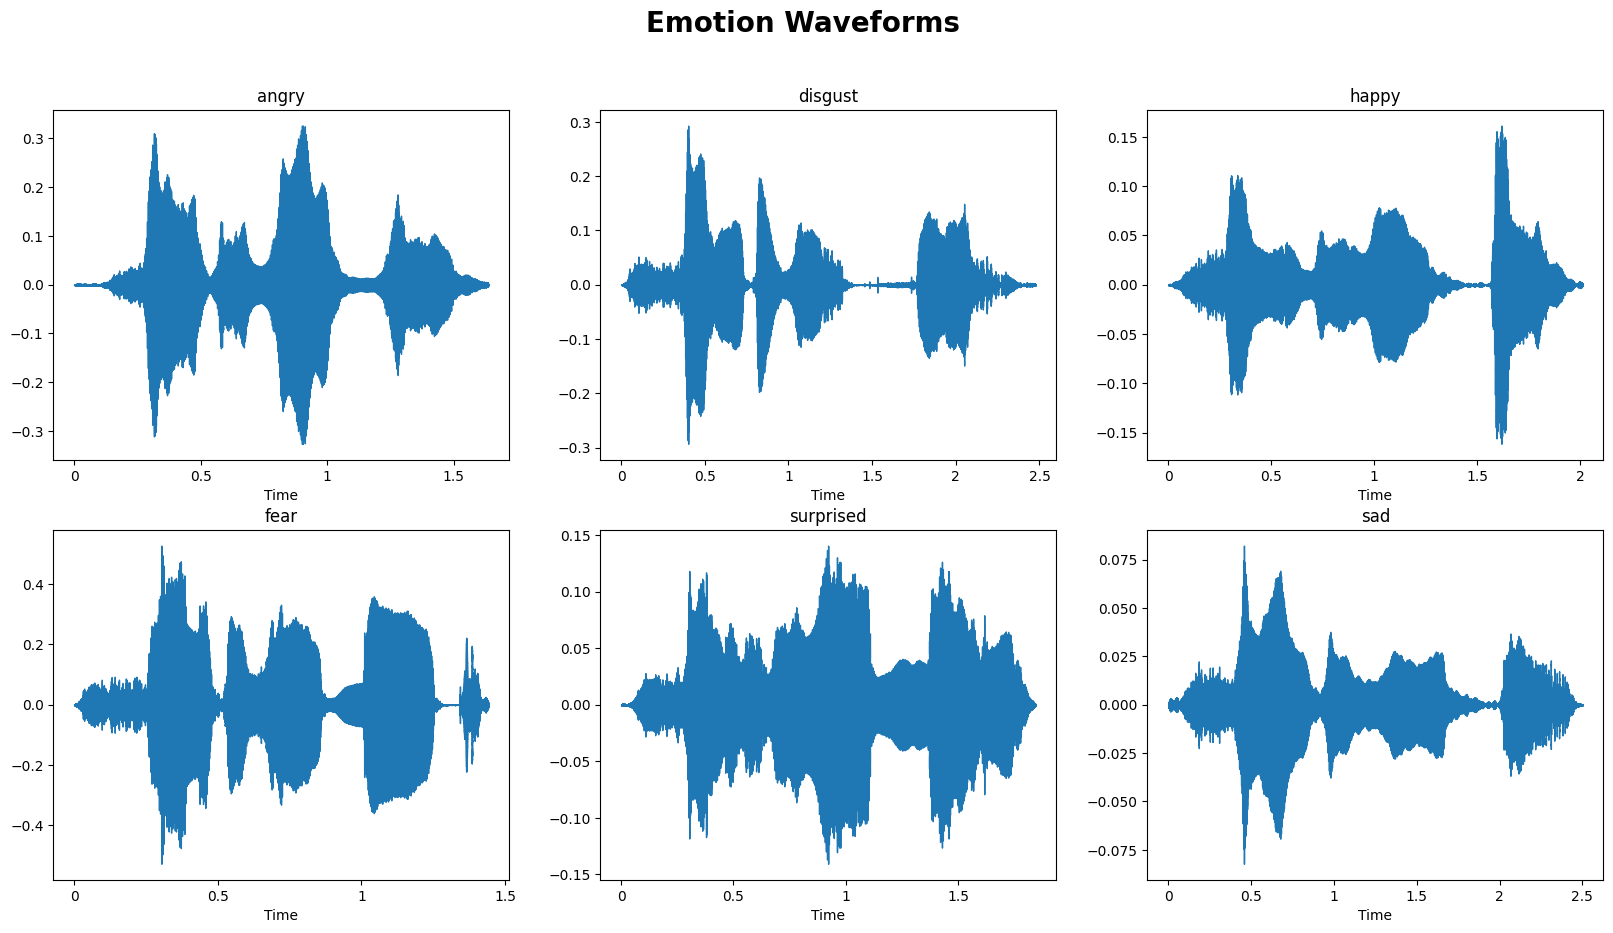

In [173]:
#"angry", "disgust", "fear", "happy", "neural", "surprised", "sad"
emotion_an = 'angry'
path_an = np.array(df_tess['wavs'][df_tess['emotion']==emotion_an])[0]
data_an, sr_an = librosa.load(path_an)
x_an = librosa.stft(data_an)
xdb_an = librosa.amplitude_to_db(abs(x_an))

emotion_dis = 'disgust'
path_dis = np.array(df_tess['wavs'][df_tess['emotion']==emotion_dis])[0]
data_dis, sr_dis = librosa.load(path_dis)
x_dis = librosa.stft(data_dis)
xdb_dis = librosa.amplitude_to_db(abs(x_dis))

emotion_fear = 'fear'
path_fear = np.array(df_tess['wavs'][df_tess['emotion']==emotion_fear])[0]
data_fear, sr_fear = librosa.load(path_fear)
x_fear = librosa.stft(data_fear)
xdb_fear = librosa.amplitude_to_db(abs(x_fear))

emotion_hap = 'happy'
path_hap = np.array(df_tess['wavs'][df_tess['emotion']==emotion_hap])[0]
data_hap, sr_hap = librosa.load(path_hap)
x_hap = librosa.stft(data_hap)
xdb_hap = librosa.amplitude_to_db(abs(x_hap))

emotion_sur = 'surprised'
path_sur = np.array(df_tess['wavs'][df_tess['emotion']==emotion_sur])[0]
data_sur, sr_sur = librosa.load(path_sur)
x_sur = librosa.stft(data_sur)
xdb_sur = librosa.amplitude_to_db(abs(x_sur))

emotion_sad = 'sad'
path_sad = np.array(df_tess['wavs'][df_tess['emotion']==emotion_sad])[0]
data_sad, sr_sad = librosa.load(path_sad)
x_sad = librosa.stft(data_sad)
xdb_sad = librosa.amplitude_to_db(abs(x_sad))


fig, axs = plt.subplots(2,3,figsize=(20, 10))
fig.suptitle('Emotion Waveforms', fontweight="bold", size=20)

librosa.display.waveshow(data_an, sr=sr_an, ax=axs[0,0])
axs[0, 0].set_title("angry");

librosa.display.waveshow(data_dis, sr=sr_dis, ax=axs[0,1])
axs[0, 1].set_title("disgust");

librosa.display.waveshow(data_hap, sr=sr_hap, ax=axs[0,2])
axs[0, 2].set_title("happy");

librosa.display.waveshow(data_fear, sr=sr_fear, ax=axs[1,0])
axs[1, 0].set_title("fear");

librosa.display.waveshow(data_sur, sr=sr_sur, ax=axs[1,1])
axs[1, 1].set_title("surprised");

librosa.display.waveshow(data_sad, sr=sr_sad, ax=axs[1,2])
axs[1, 2].set_title("sad");

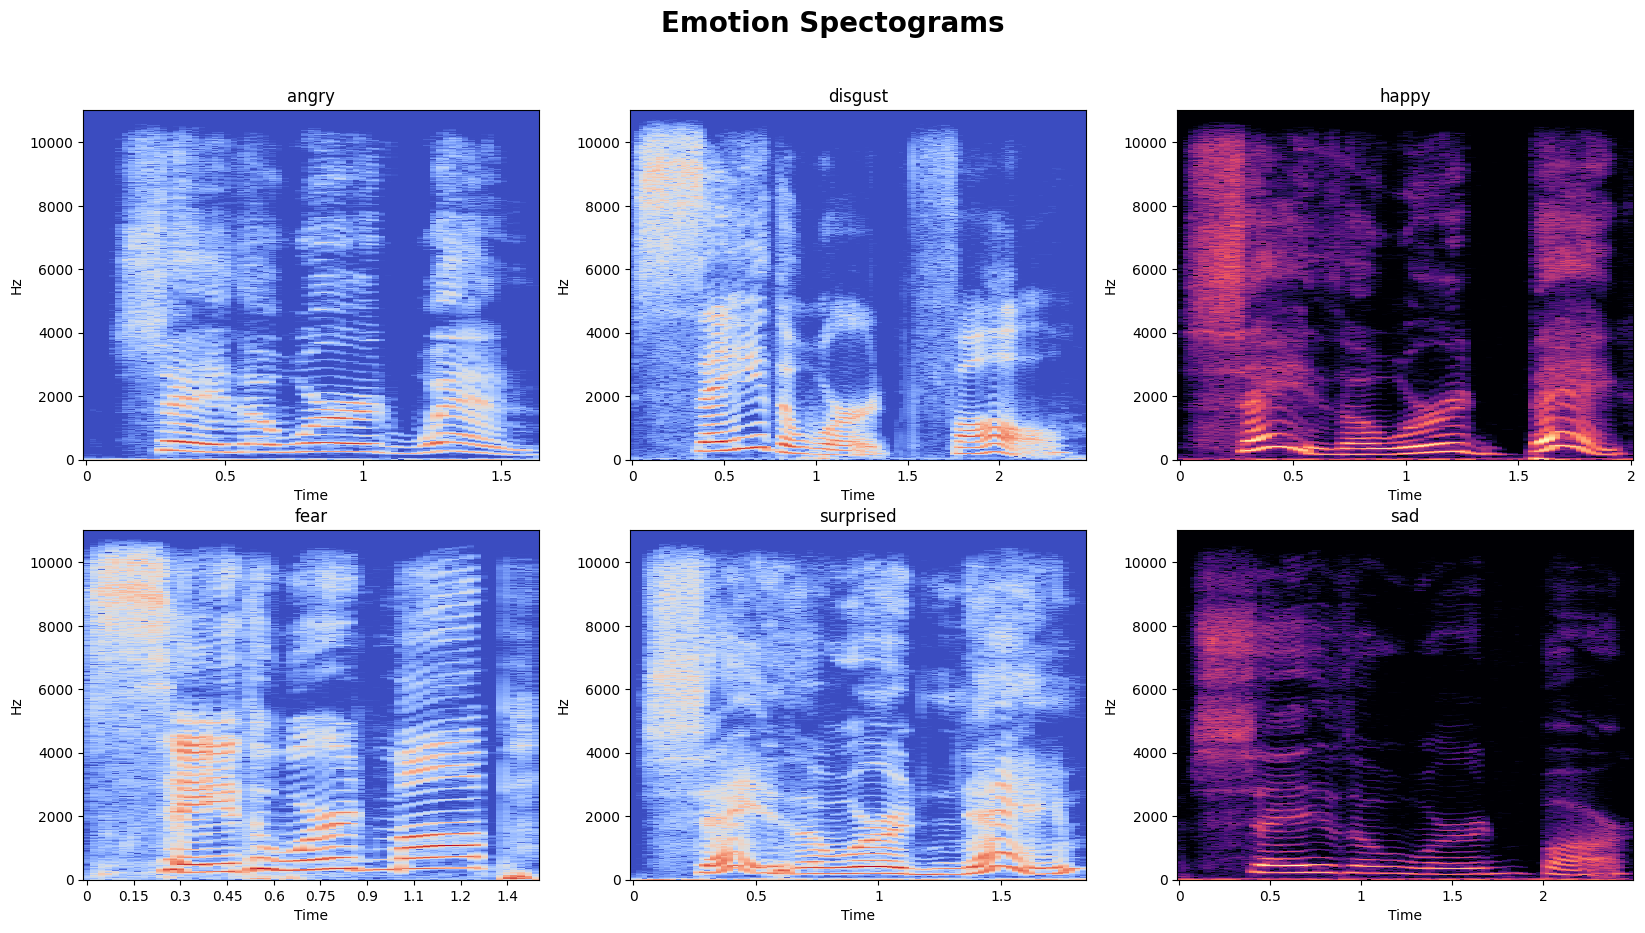

In [175]:
fig, axs = plt.subplots(2,3,figsize=(20, 10))
fig.suptitle('Emotion Spectograms', fontweight="bold", size=20)

librosa.display.specshow(xdb_an, sr=sr_an, x_axis='time', y_axis='hz', ax=axs[0,0])
axs[0, 0].set_title("angry");

librosa.display.specshow(xdb_dis, sr=sr_dis, x_axis='time', y_axis='hz', ax=axs[0,1])
axs[0, 1].set_title("disgust");

librosa.display.specshow(xdb_hap, sr=sr_hap, x_axis='time', y_axis='hz', ax=axs[0,2])
axs[0, 2].set_title("happy");

librosa.display.specshow(xdb_fear, sr=sr_fear, x_axis='time', y_axis='hz', ax=axs[1,0])
axs[1, 0].set_title("fear");

librosa.display.specshow(xdb_sur, sr=sr_sur, x_axis='time', y_axis='hz', ax=axs[1,1])
axs[1, 1].set_title("surprised");

librosa.display.specshow(xdb_sad, sr=sr_sad, x_axis='time', y_axis='hz', ax=axs[1,2])
axs[1, 2].set_title("sad");

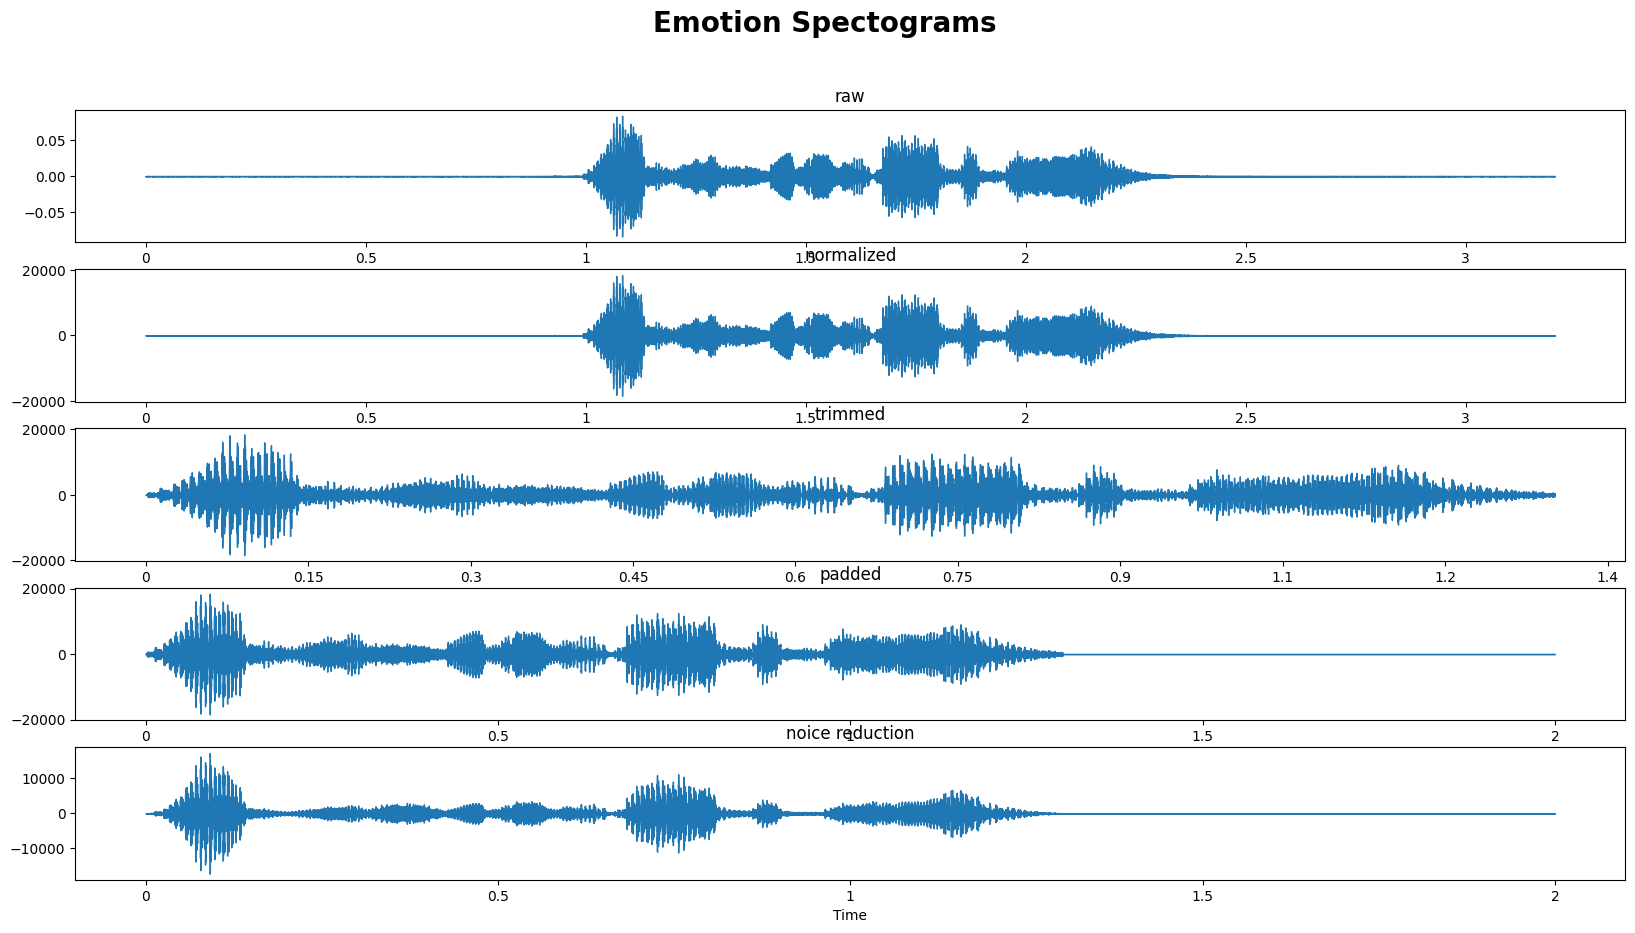

In [192]:
emotion = 'happy'
path = np.array(df_rav['wavs'][df_rav['emotion']==emotion])[0]
raw_audio = AudioSegment.from_file(np.array(df_rav['wavs'][df_rav['emotion']==emotion_hap])[0])
x, sr = librosa.load(np.array(df_rav['wavs'][df_rav['emotion']==emotion_hap])[0], sr = None)
normalizedsound = effects.normalize(raw_audio, headroom = 5.0) 
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')
xt, index = librosa.effects.trim(normal_x, top_db = 25)
padded_x = fix_length(xt, size=2*sr)
final_x = nr.reduce_noise(padded_x, sr= sr)


fig, axs = plt.subplots(5,1,figsize=(20, 10))
fig.suptitle('Emotion Spectograms', fontweight="bold", size=20)


librosa.display.waveshow(x, sr, ax=axs[0])
plt.title('Normalized audio rav')
axs[0].set_title("raw");

librosa.display.waveshow(normal_x, sr, ax=axs[1])
plt.title('Normalized audio rav')
axs[1].set_title("normalized");

librosa.display.waveshow(xt, sr, ax=axs[2])
axs[2].set_title("trimmed");

librosa.display.waveshow(padded_x, sr, ax=axs[3])
axs[3].set_title("padded");

librosa.display.waveshow(final_x, sr, ax=axs[4])
axs[4].set_title("noice reduction");

In [193]:
frame_length = 2048
hop_length = 512

f1 = librosa.feature.rms(final_x, frame_length=frame_length, hop_length=hop_length) # Energy - Root Mean Square (RMS)
print('Energy shape:', f1.shape)
f2 = librosa.feature.zero_crossing_rate(final_x, frame_length=frame_length, hop_length=hop_length) # Zero Crossed Rate (ZCR)
print('ZCR shape:', f2.shape)
f3 = librosa.feature.mfcc(final_x, sr=sr, S=None, n_mfcc=13, hop_length = hop_length) # MFCCs
print('MFCCs shape:', f3.shape)



Energy shape: (1, 188)
ZCR shape: (1, 188)
MFCCs shape: (13, 188)


In [194]:
f1

array([[1.51998413e+02, 3.41470428e+02, 8.70294983e+02, 1.42325854e+03,
        2.19141699e+03, 3.08542993e+03, 4.03566650e+03, 4.67625977e+03,
        5.16058838e+03, 5.29655859e+03, 4.86759277e+03, 4.24827197e+03,
        3.27106543e+03, 2.14378638e+03, 1.28636670e+03, 7.25164734e+02,
        5.91965698e+02, 4.91880646e+02, 3.92899384e+02, 3.25529236e+02,
        3.27637390e+02, 4.06375092e+02, 5.41775208e+02, 7.13978943e+02,
        8.33747864e+02, 9.16001343e+02, 9.48500549e+02, 8.75875488e+02,
        7.59538208e+02, 6.53956299e+02, 5.78355042e+02, 6.51708069e+02,
        7.79531494e+02, 8.47770142e+02, 8.91657104e+02, 8.59211975e+02,
        7.97378113e+02, 7.15039673e+02, 5.90359375e+02, 5.14494934e+02,
        5.86574646e+02, 8.01398315e+02, 1.10798804e+03, 1.23515686e+03,
        1.18442981e+03, 1.08157715e+03, 8.61415527e+02, 7.77805725e+02,
        9.58229370e+02, 1.05993164e+03, 1.15153491e+03, 1.17500806e+03,
        1.04771509e+03, 9.21616272e+02, 8.59355042e+02, 8.544455

In [ ]:
f1_rms = np.expand_dims(f1, axis=2)
f2_zcr = np.expand_dims(f2, axis=2)
f3_mfcc = np.expand_dims(f3, axis=0)

f1_rms.shape, f2_zcr.shape, f3_mfcc.shape

In [ ]:
f_mfccs = np.swapaxes(f3_mfcc,1, 2)
f_mfccs.shape

In [ ]:
# Concatenating all features to 'X' variable.
X = np.concatenate((f2_zcr, f1_rms, f_mfccs), axis=2)
X.shape